In [23]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
normal_data = pd.read_json("normal.json")
chat_data = pd.read_json("chat.json")
group1_data = pd.read_json("clean-group-1.json")

spam_data = pd.read_json("spam.json")
spam_data2 = pd.read_json("spam2.json")
spam_data2_up = pd.read_json("spam2-up.json")

group1_df = pd.DataFrame({ 'type': 0, 'message': group1_data.iloc[:, 0] }) # (개인) 정상
normal_df = pd.DataFrame({ 'type': 0, 'message': normal_data.iloc[:, 0] }) # (경찰청) 광고
sampled_normal_df = normal_df.sample(n=10000, random_state=42)
chat_df = pd.DataFrame({ 'type': 0, 'message': chat_data.iloc[:, 0] }) # 한국어 멀티턴 대화
sampled_chat_df = chat_df.sample(n=10000, random_state=42)

spam_df = pd.DataFrame({ 'type': 1, 'message': spam_data.iloc[:4000, 0] }) # (경찰청) 스팸
spam2_df = pd.DataFrame({ 'type': 1, 'message': spam_data2.iloc[:, 0] }) # (개인) 스팸
spam2_up_df = pd.DataFrame({ 'type': 1, 'message': spam_data2_up.iloc[:, 0] }) # (개인) 스팸 증강

data = pd.concat([sampled_normal_df, sampled_chat_df, group1_df, spam_df, spam2_df, spam2_up_df], ignore_index=True)
data.to_json("dataset-jamo.json", orient='records', lines=True, force_ascii=False)
data

,type,message
0,0,[ak플라자 수원]ak플라자 수원에 찾아온 크리스마스> http://m.akplaz...
1,0,"[kt] d- super flexday / (금) open!?금/토/일, 단 일 최..."
2,0,"향남 청년정육점 소잡는날!!육회, 사시미 예약받습니다!!육회 사시면 수제소스 증정!..."
3,0,"[skt] t 멤버십 vip 고객님 한정 tmap 대리 만 원 쿠폰 안내고객님, 안..."
4,0,hearts봉선동 대림 e-편한세상hearts 남구 교육 번지 no. 브랜드 광주 ...
...,...,...
28167,1,고객님으이 으인증번호는 1819 입니닷. http://dmm2o24.com/
28168,1,gaip 200% b0nus ev3nt 농구 매 쿼터 유럽형 kasino star ...
28169,1,무료 3만원 환.가.능 카 슬 스 미 다 o k https://u2.to/2kf4j...
28170,1,cashback햏사 카.지.노 2% 3플러스2 5플러스3 1플러스5 3플러스1 1플...


In [25]:
from cleanutils import word_to_jamo
data["message"] = data["message"].apply(word_to_jamo)
data

,type,message
0,0,[akㅍㅡㄹㄹㅏ-ㅈㅏ- ㅅㅜ-ㅇㅝㄴ]akㅍㅡㄹㄹㅏ-ㅈㅏ- ㅅㅜ-ㅇㅝㄴㅇㅔ- ㅊㅏㅈㅇ...
1,0,[kt] d- super flexday / (ㄱㅡㅁ) open!?ㄱㅡㅁ/ㅌㅗ-/ㅇㅣ...
2,0,"ㅎㅑㅇㄴㅏㅁ ㅊㅓㅇㄴㅕㄴㅈㅓㅇㅇㅠㄱㅈㅓㅁ ㅅㅗ-ㅈㅏㅂㄴㅡㄴㄴㅏㄹ!!ㅇㅠㄱㅎㅚ-, ㅅ..."
3,0,[skt] t ㅁㅔㅁㅂㅓ-ㅅㅣㅂ vip ㄱㅗ-ㄱㅐㄱㄴㅣㅁ ㅎㅏㄴㅈㅓㅇ tmap ㄷㅐ...
4,0,heartsㅂㅗㅇㅅㅓㄴㄷㅗㅇ ㄷㅐ-ㄹㅣㅁ e-ㅍㅕㄴㅎㅏㄴㅅㅔ-ㅅㅏㅇhearts ㄴㅏ...
...,...,...
28167,1,ㄱㅗ-ㄱㅐㄱㄴㅣㅁㅇㅡ-ㅇㅣ- ㅇㅡ-ㅇㅣㄴㅈㅡㅇㅂㅓㄴㅎㅗ-ㄴㅡㄴ 1819 ㅇㅣㅂㄴㅣ-...
28168,1,gaip 200% b0nus ev3nt ㄴㅗㅇㄱㅜ- ㅁㅐ- ㅋㅝ-ㅌㅓ- ㅇㅠ-ㄹㅓㅂ...
28169,1,ㅁㅜ-ㄹㅛ- 3ㅁㅏㄴㅇㅝㄴ ㅎㅘㄴ.ㄱㅏ-.ㄴㅡㅇ ㅋㅏ- ㅅㅡㄹ ㅅㅡ- ㅁㅣ- ㄷㅏ-...
28170,1,cashbackㅎㅐㅎㅅㅏ- ㅋㅏ-.ㅈㅣ-.ㄴㅗ- 2% 3ㅍㅡㄹㄹㅓ-ㅅㅡ-2 5ㅍㅡㄹ...


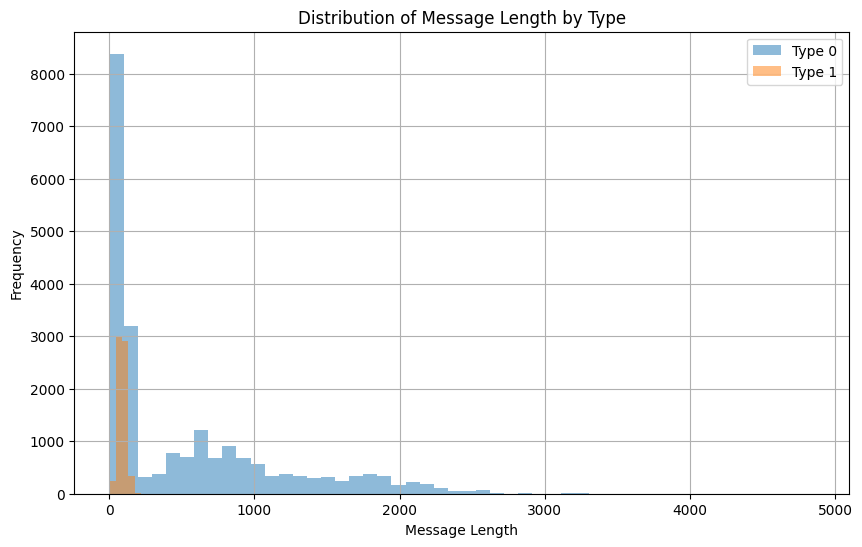

In [26]:
# Calculate the length of the message for each row
data['message_length'] = data['message'].apply(len)

# Separate data by type
data_type_0 = data[data['type'] == 0]
data_type_1 = data[data['type'] == 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histogram for type 0
plt.hist(data_type_0['message_length'], bins=50, alpha=0.5, label='Type 0')

# Plot histogram for type 1
plt.hist(data_type_1['message_length'], bins=50, alpha=0.5, label='Type 1')

# Add title and labels
plt.title('Distribution of Message Length by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [27]:
data.isnull().values.any()

np.False_

In [28]:
data['message'].nunique()

28160

<Axes: xlabel='type'>

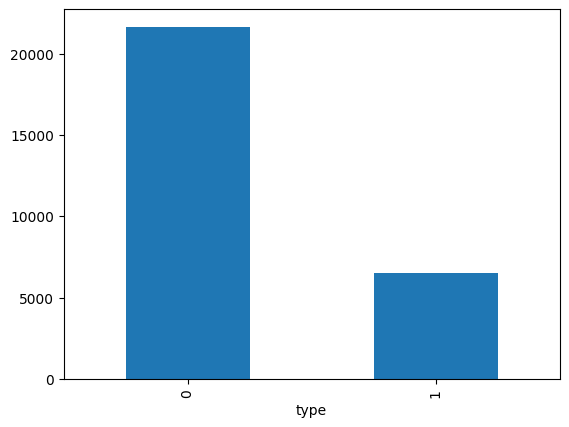

In [29]:
data['type'].value_counts().plot(kind='bar')

In [30]:
data.to_json("dataset-jamo.json", orient='records', lines=True, force_ascii=False)

In [31]:
from sklearn.model_selection import train_test_split

X = data["message"]
y = data["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_df = pd.DataFrame({'message': X_train, 'type': y_train})
train_df.to_json('dataset-jamo-train.json', orient='records', indent=4, force_ascii=False)

test_df = pd.DataFrame({'message': X_test, 'type': y_test})
test_df.to_json('dataset-jamo-test.json', orient='records', indent=4, force_ascii=False)


In [32]:
from tf_keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(char_level=True, filters="") 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
vocab_size = len(tokenizer.word_index) + 1
vocab_size


124

In [33]:
import pickle
with open('tokenizer-jamo.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)